# install labries

In [272]:
!pip install pip


In [273]:
!pip install pandas 

In [274]:
!pip install numpy

In [275]:
!pip install matplotlib

In [276]:
!pip install seaborn

In [277]:
!pip install scipy 

# importing seaction

In [278]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy as sp

#let' chech the first five entries of daraset


In [279]:
#using the csv file 
df = pd.read_csv("C:\\Users\\91830\\OneDrive\\Desktop\\Project\\Analyzing selling priceDA.csv")

#checking the first 5 entries
df.head()   

,Unnamed: 0,3,Alfa-romero,168,gas,std,two,convertible,rwd,front,88.6,5,130,2.68,9,111,5000,21,27,13495
0,0,3,Alfa-romero,162,gas,std,two,convertible,rwd,front,88.6,5,130,2.68,9.0,111,5000,21,27,16500
1,1,1,Alfa-romero,166,gas,std,two,hatchback,rwd,front,94.5,5,152,3.47,9.0,154,5000,19,26,16500
2,2,2,audi,163,gas,std,two,sedan,fwd,front,99.8,5,109,3.40,10.0,102,5500,24,30,13950
3,3,2,audi,165,gas,std,two,sedan,4wd,front,99.4,5,136,3.40,8.0,115,5500,18,22,17450
4,4,2,audo,169,gas,std,two,sedan,fwd,front,99.8,5,136,3.40,8.5,110,5500,19,25,15250


In [280]:
#Defining headers for our data set
headers = ['A-sybolig','B-normalized-lasses','make','4-fuel-type','5-aspiratio','6-num-of-doors','body-style','drive-wheels','9-engine-location','10-wheel-base','length','width','height','14-curb-weight','15-engine-type','16-num-of-cyliders','17-engine-size','fuel','19-bore','price']
df.columns = headers
df.head()

,A-sybolig,B-normalized-lasses,make,4-fuel-type,5-aspiratio,6-num-of-doors,body-style,drive-wheels,9-engine-location,10-wheel-base,length,width,height,14-curb-weight,15-engine-type,16-num-of-cyliders,17-engine-size,fuel,19-bore,price
0,0,3,Alfa-romero,162,gas,std,two,convertible,rwd,front,88.6,5,130,2.68,9.0,111,5000,21,27,16500
1,1,1,Alfa-romero,166,gas,std,two,hatchback,rwd,front,94.5,5,152,3.47,9.0,154,5000,19,26,16500
2,2,2,audi,163,gas,std,two,sedan,fwd,front,99.8,5,109,3.40,10.0,102,5500,24,30,13950
3,3,2,audi,165,gas,std,two,sedan,4wd,front,99.4,5,136,3.40,8.0,115,5500,18,22,17450
4,4,2,audo,169,gas,std,two,sedan,fwd,front,99.8,5,136,3.40,8.5,110,5500,19,25,15250


In [281]:
data = df

#finding the missing values
data.isna().any()

A-sybolig              False
B-normalized-lasses    False
make                   False
4-fuel-type            False
5-aspiratio            False
6-num-of-doors         False
body-style             False
drive-wheels           False
9-engine-location      False
10-wheel-base          False
length                 False
width                  False
height                 False
14-curb-weight         False
15-engine-type         False
16-num-of-cyliders     False
17-engine-size         False
fuel                   False
19-bore                False
price                  False
dtype: bool

In [282]:
#converting mpg to L / 100 km
data['19-bore'] = 235 / data['19-bore']
data.rename(columns = {'19-bore': "19-bore-L/ 100km"}, inplace = True)

print(data.columns)

#checking the data type of each columns
data.dtypes

Index(['A-sybolig', 'B-normalized-lasses', 'make', '4-fuel-type',
       '5-aspiratio', '6-num-of-doors', 'body-style', 'drive-wheels',
       '9-engine-location', '10-wheel-base', 'length', 'width', 'height',
       '14-curb-weight', '15-engine-type', '16-num-of-cyliders',
       '17-engine-size', 'fuel', '19-bore-L/ 100km', 'price'],
      dtype='object')


A-sybolig                int64
B-normalized-lasses      int64
make                    object
4-fuel-type              int64
5-aspiratio             object
6-num-of-doors          object
body-style              object
drive-wheels            object
9-engine-location       object
10-wheel-base           object
length                 float64
width                    int64
height                   int64
14-curb-weight         float64
15-engine-type         float64
16-num-of-cyliders       int64
17-engine-size           int64
fuel                     int64
19-bore-L/ 100km       float64
price                    int64
dtype: object

In [283]:
#Here price is of objet type(string), it should be int or flout, so we need change it

data.price.unique()

array([16500, 13950, 17450, 15250], dtype=int64)

In [284]:
#here it comtains '?' , so we drop it 
data = data[data.price != '?']

#checking it again
data.dtypes

A-sybolig                int64
B-normalized-lasses      int64
make                    object
4-fuel-type              int64
5-aspiratio             object
6-num-of-doors          object
body-style              object
drive-wheels            object
9-engine-location       object
10-wheel-base           object
length                 float64
width                    int64
height                   int64
14-curb-weight         float64
15-engine-type         float64
16-num-of-cyliders       int64
17-engine-size           int64
fuel                     int64
19-bore-L/ 100km       float64
price                    int64
dtype: object

0      High
1      High
2       Low
3      High
4    medium
Name: price-binned, dtype: category
Categories (3, object): ['Low' < 'medium' < 'High']


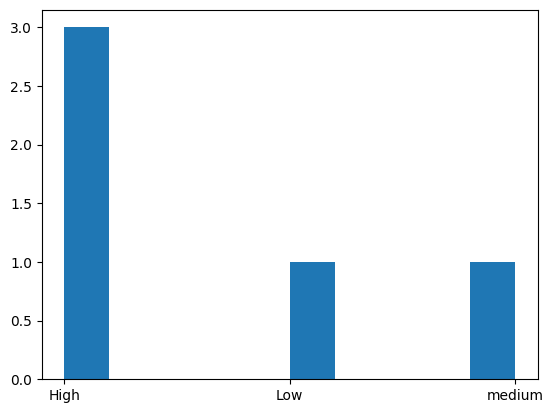

In [285]:
#Normalizing values by using simple feature scaling method examples (do for the rest) and binning - gruoping values

data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()


#binning - grouping values
bins = np.linspace(min(data['price']), max(data['price']),4)
group_names =['Low','medium','High']
data['price-binned'] = pd.cut(data['price'],bins, labels = group_names, include_lowest= True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

In [286]:
#Doing descriptive analysis of data categorical  to numerical values

#categorical to numerical variables
pd.get_dummies(data['fuel'].head)

#descriptive to numerical variable
#NaN are skipped
data.describe()

,A-sybolig,B-normalized-lasses,4-fuel-type,length,width,height,14-curb-weight,15-engine-type,16-num-of-cyliders,17-engine-size,fuel,19-bore-L/ 100km,price
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,2.000000,2.000000,165.000000,0.966132,1.0,0.872368,3.27000,8.90000,118.400000,5300.000000,20.200000,9.131463,15930.00000
std,1.581139,0.707107,2.738613,0.049233,0.0,0.102090,0.33121,0.74162,20.452384,273.861279,2.387467,1.043130,1354.89852
min,0.000000,1.000000,162.000000,0.887776,1.0,0.717105,2.68000,8.00000,102.000000,5000.000000,18.000000,7.833333,13950.00000
25%,1.000000,2.000000,163.000000,0.946894,1.0,0.855263,3.40000,8.50000,110.000000,5000.000000,19.000000,8.703704,15250.00000
50%,2.000000,2.000000,165.000000,0.995992,1.0,0.894737,3.40000,9.00000,111.000000,5500.000000,19.000000,9.038462,16500.00000
75%,3.000000,2.000000,166.000000,1.000000,1.0,0.894737,3.40000,9.00000,115.000000,5500.000000,21.000000,9.400000,16500.00000
max,4.000000,3.000000,169.000000,1.000000,1.0,1.000000,3.47000,10.00000,154.000000,5500.000000,24.000000,10.681818,17450.00000


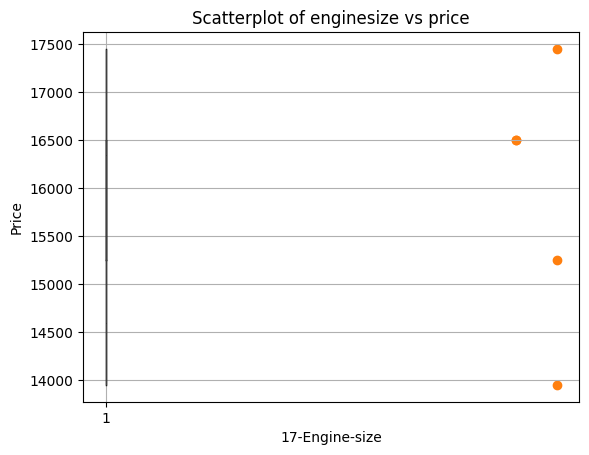

In [287]:
##Plotting the data accoding to the price based on engine size

# example of box plot
plt.boxplot(data['price'])

#by using seaborn

sns.boxplot(x ='drive-wheels', y = 'price', data=data)

#Predicating price based on engine size
#known on x and predicatable on y

plt.scatter(data['17-engine-size'], data['price'])
plt.title('Scatterplot of enginesize vs price')
plt.xlabel('17-Engine-size')  
plt.ylabel('Price')
plt.grid()
plt.show()

In [288]:
#Grouping the data accoding to wheel , body - style and price
# Grouping Data

test = data[['drive-wheels','body-style','price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],as_index = False).mean()
data_grp

,drive-wheels,body-style,price
0,convertible,two,16500.0
1,hatchback,two,16500.0
2,sedan,two,15550.0


In [289]:
##using the pivot method and plotting the heatmap according to the data obtained by pivot method

#pibot method
data_pivot = data_grp.pivot(index = 'drive-wheels', columns = 'body-style')
data_pivot



,price
body-style,two
drive-wheels,
convertible,16500.0
hatchback,16500.0
sedan,15550.0


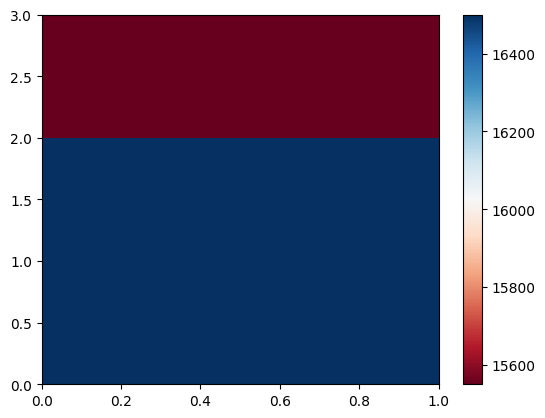

In [290]:
#headmap for visualizing data
plt.pcolor(data_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

(0.0, 17632.95454317507)

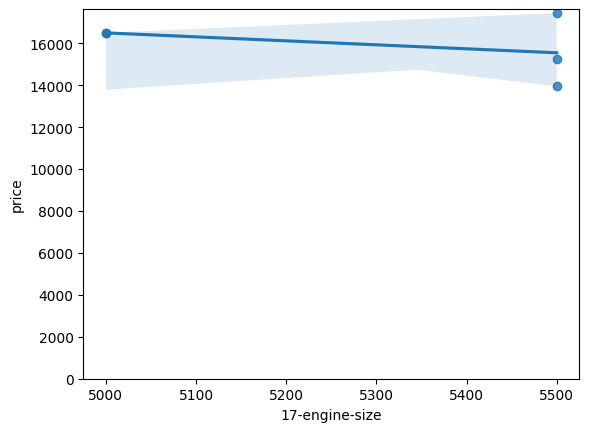

In [301]:
##Obtaining the final result and showing it in the form of a graph . As the slope is increasing in apositive direction, it is a positive linear relationshp

#Analysis of variance - Anova
#returns f-test and p-value
#f-test = variance between sample group means divided by
#variation within sample group
#p - value = confidence degree

#strong corealtion between a categorical variable
#if annova test gives large f-test and small p-value

#correlation - measures dependency, not causation

sns.regplot(x ='17-engine-size', y = 'price', data=data)
plt.ylim(0, )